# Wald approximation

General test statistic is defined as:

$t_{\mu} = -2 \ln \left[ \frac{\mathcal{L}(\mu)}{\mathcal{L}(\hat{\mu})} \right]$

In case of large statistic the Wald approximation holds:

$t_{\mu} \rightarrow \frac{(\mu - \hat{\mu})^{2}}{\sigma^{2}} + \mathcal{O}\left( \frac{1}{\sqrt{N}} \right)$ 


Another type of test statistic (used at Tevatron):

$q = -2 \ln \left[ \frac{\mathcal{L}(\mu=1)}{\mathcal{L}(\mu=0)} \right]$

which can be rewritten as:

$q
=
-2 \ln \left[ \frac{\mathcal{L}(\mu=1)}{\mathcal{L}(\hat{\mu)}} \right]
+2 \ln \left[ \frac{\mathcal{L}(\mu=0)}{\mathcal{L}(\hat{\mu)}} \right]
$

therefore at large statistic using the the Wald approximation we get:

$q = \frac{(1 - \hat{\mu})^{2}}{\sigma^{2}_{\hat{\mu}}} - \frac{\hat{\mu}^{2}}{\sigma^{2}_{\hat{\mu}}}$


**Likelihood:**

$\mathcal{L} = \prod\limits_{i=1}^{n_{bins}} \mathcal{L_{i}}$

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
%matplotlib inline

### Utility functions

In [84]:
def calc_ll(data, model):
    """Calculates the log likelihood based on Poisson distribution"""
    if not len(data) == len(model):
        print('Data and model arrays are not the same length!')
        
    ll_sum = 0.0
    for d, m in zip(data, model):
        ll = np.log(poisson.pmf(d, m))
        ll_sum = ll_sum + ll
    return ll_sum

In [94]:
def calc_tmu(data, model):
    l1 = calc_ll(data, model)
    l2 = calc_ll(data, model)
    tmu = -2.0*(l1 - l2)
    return tmu

In [95]:
def get_ll_from_generated_sample_ensemble(samples):
    ll = []
    for i in range(samples):
        bkg = poisson.rvs(bkg_model)
        ll.append( calc_ll(bkg, bkg_model) )
    return ll

In [96]:
def get_tmu_from_generated_sample_ensemble(samples):
    tmu = []
    for i in range(samples):
        bkg = poisson.rvs(bkg_model)
        tmu.append( calc_tmu(bkg, bkg_model) )
    return tmu

In [97]:
log_likelihood([1], [2])

0.2706705664732254

## Main block

### Background model

In [98]:
x   = np.linspace(0.0, 100.0)
a   = 20.0
tau = 50.0
bkg_model = a*np.exp(-x/tau)

Actual realization of the background

In [99]:
bkg = poisson.rvs(bkg_model, 1)

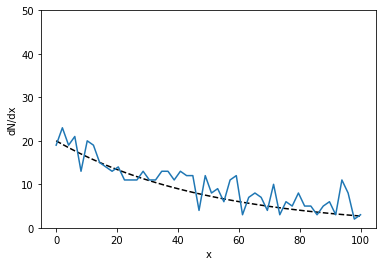

In [100]:
f, a = plt.subplots();
a.plot(x, bkg_model, 'k', linestyle='--', label='Background model');
a.plot(x, bkg, label='Background');
a.set_xlabel('x');
a.set_ylabel('dN/dx');
a.set_ylim(0.0, 50.0);

## Signal model

In [108]:
x   = np.linspace(0.0, 100.0)
x0    = 30.0
sigma = 5.0
amp   = 100.0
sig_model = amp*norm.pdf(x, x0, sigma)

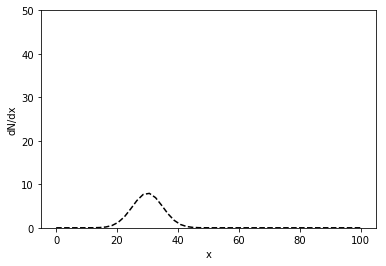

In [110]:
f, a = plt.subplots();
a.plot(x, sig_model, 'k', linestyle='--', label='Signal model');
a.set_xlabel('x');
a.set_ylabel('dN/dx');
a.set_ylim(0.0, 50.0);

## Signal + background model

In [111]:
sigbkg_model = bkg_model + sig_model

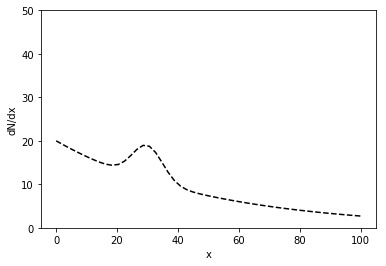

In [112]:
f, a = plt.subplots();
a.plot(x, sigbkg_model, 'k', linestyle='--', label='Signal + background model');
a.set_xlabel('x');
a.set_ylabel('dN/dx');
a.set_ylim(0.0, 50.0);

## Generate ensemble

In [ ]:
tmu_ensemble = get_tmu_from_generated_sample_ensemble(10000);

In [ ]:
f, a = plt.subplots();
a.hist(tmu_ensemble, bins=30);
a.set_xlabel(r'$t_{\mu}$')
a.set_ylabel('Frequency')